<a href="https://colab.research.google.com/github/saeedd1/draw/blob/main/mmaghale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:

import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read the map data
country_provinces = gpd.read_file("../input/ph-provinces/Provinces.shp")

country_provinces.iloc[52,:]

DriverError: ignored

In [ ]:
type(country_provinces)

geopandas.geodataframe.GeoDataFrame

In [ ]:

data = country_provinces.loc[:,['PROVINCE','REGION','geometry']]

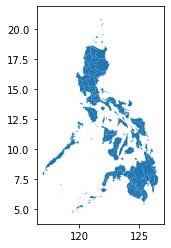

In [ ]:
data.plot();

In [ ]:
production_data = pd.read_csv('../input/production/production.csv',na_values=['..'],thousands=',')
production_data.shape

(9768, 5)

In [ ]:
production_data['Area'] = production_data.Area.replace({'\..':''},regex=True)
production_data.sample(5)

,Commodity,Area Type,Area,Year,Production (mt)
2820,Corn,Provincial,Sultan Kudarat,2002,174135.0
6205,White Corn,Provincial,Agusan del Sur,1988,29077.0
8431,Yellow Corn,Provincial,Siquijor,2003,54.0
9266,Yellow Corn,Regional,REGION XII (SOCCSKSARGEN),2013,1036036.0
3542,White Corn,Regional,REGION I (ILOCOS REGION),1998,32697.0


In [ ]:
production_data.dtypes

Commodity           object
Area Type           object
Area                object
Year                 int64
Production (mt)    float64
dtype: object

In [ ]:
production_data.columns = ['commodity','area_type','PROVINCE','year','production']
production_data.sample(5)

,commodity,area_type,PROVINCE,year,production
3262,Corn,Provincial,Tawi-tawi,2015,837.0
8082,Yellow Corn,Regional,REGION VI (WESTERN VISAYAS),2017,212515.0
810,Corn,Provincial,Pampanga,2005,42027.0
1595,Corn,Provincial,Antique,1998,388.0
3887,White Corn,Provincial,Quirino,2013,386.0


In [ ]:
palay_latest = production_data.loc[(production_data['commodity']=='Corn') & (production_data['year']==2019) & (production_data['area_type']=='Provincial')]
palay_latest.sample(5)

,commodity,area_type,PROVINCE,year,production
1715,Corn,Provincial,Iloilo,2019,73543.69
560,Corn,Provincial,Isabela,2019,1135479.00
3233,Corn,Provincial,Sulu,2019,1287.00
1979,Corn,Provincial,Biliran,2019,592.15
1187,Corn,Provincial,Occidental Mindoro,2019,78605.00


In [ ]:
country_provinces = country_provinces.merge(palay_latest,on='PROVINCE')

In [ ]:
country_provinces

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,commodity,area_type,year,production
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Corn,Provincial,2019,16209.00
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",Corn,Provincial,2019,9216.95
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",Corn,Provincial,2019,112863.35
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",Corn,Provincial,2019,3717.01
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",Corn,Provincial,2019,40037.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,177,PHL,Philippines,77,Tarlac,None,None,Lalawigan|Probinsya,Province,Tarlac,Central Luzon (Region III),"POLYGON ((120.63007 15.73335, 120.63052 15.729...",Corn,Provincial,2019,131507.00
74,177,PHL,Philippines,79,Zambales,None,None,Lalawigan|Probinsya,Province,Zambales,Central Luzon (Region III),"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ...",Corn,Provincial,2019,2825.50
75,177,PHL,Philippines,80,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7...",Corn,Provincial,2019,49864.81
76,177,PHL,Philippines,81,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6...",Corn,Provincial,2019,94793.14


Text(0.5, 1.0, 'Corn Production')

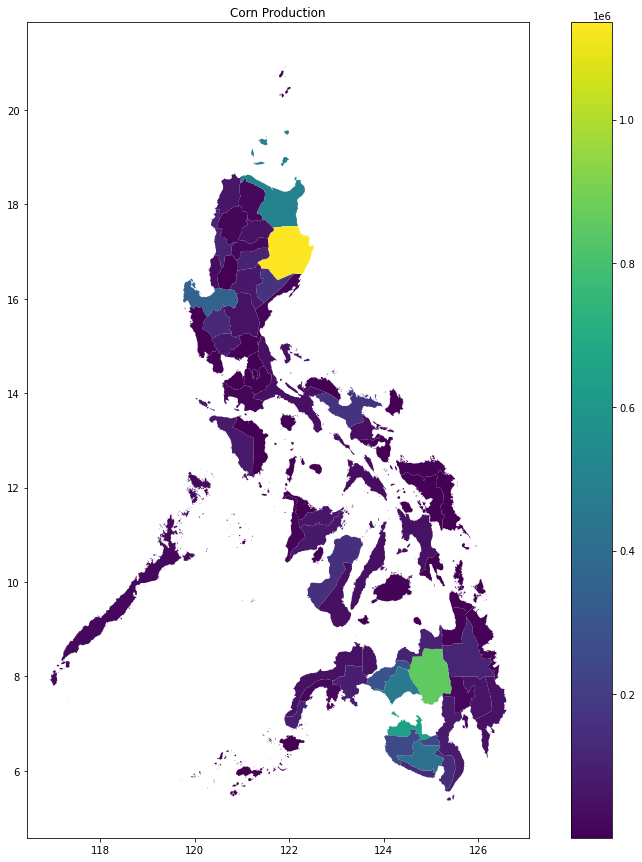

In [ ]:
country_provinces.plot('production', figsize=(15, 15), legend=True)
plt.title('Corn Production')